In [2]:
"""import kagglehub
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")

print("Path to dataset files:", path)

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))"""

'import kagglehub\nfrom scipy.io import loadmat\nimport os\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\n# Download latest version\npath = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")\n\nprint("Path to dataset files:", path)\n\n# Collect all file names\nfile_names = []\nfor dirname, _, filenames in os.walk(path):\n    for filename in filenames:\n        file_names.append(os.path.join(dirname, filename))'

# Load data

In [1]:
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
path = '../Data'

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('.mat'):
            file_names.append(os.path.join(dirname, filename))
        
# Sắp xếp file theo số thứ tự (để đảm bảo đúng thứ tự subject)
file_names.sort(key=lambda x: int(x.split('eeg_record')[-1].split('.mat')[0]))

In [20]:
# Hàm đọc dữ liệu 
def load_data(file_name):
    mat = loadmat(file_name)

    # Trích xuất dữ liệu từ đối tượng 'o'
    mdata = mat['o']
    sampFreq = int(mdata['sampFreq'][0][0][0][0])  # Tần số lấy mẫu
    data = mdata['data'][0, 0]  # Dữ liệu đầy đủ

    # Lấy tín hiệu từ các kênh 4–17
    eeg_data = data[:, 3:17]

    return data, eeg_data, sampFreq

In [21]:
def load_eeg_data(file_names, subject_map=None):
    all_data = []
    for file_name in file_names:
        # Lấy Trial ID từ tên file
        trial_id = int(file_name.split('eeg_record')[-1].split('.mat')[0])

        # Nếu subject_map được cung cấp, kiểm tra xem trial_id có nằm trong subject_map không
        if subject_map is not None:
            subject_id = None
            for subject, trials in subject_map.items():
                if trial_id in trials:
                    subject_id = subject
                    break

            # Nếu trial_id không nằm trong subject_map, bỏ qua file này
            if subject_id is None:
                continue

        try:
            print(f"Đang xử lý file: {file_name}, Trial ID: {trial_id}")
            _, eeg_data, sampFreq = load_data(file_name)

            # Kiểm tra kích thước dữ liệu trả về
            if eeg_data is not None and eeg_data.size > 0:
                all_data.append((eeg_data, sampFreq))
            else:
                print(f"Dữ liệu EEG từ file {file_name} không hợp lệ hoặc rỗng.")
        except Exception as e:
            print(f"Lỗi khi xử lý file {file_name}: {e}")
    
    return all_data


# Full data

In [22]:
full_data = load_eeg_data(file_names)

Đang xử lý file: ../Data\eeg_record1.mat, Trial ID: 1
Đang xử lý file: ../Data\eeg_record2.mat, Trial ID: 2
Đang xử lý file: ../Data\eeg_record3.mat, Trial ID: 3
Đang xử lý file: ../Data\eeg_record4.mat, Trial ID: 4
Đang xử lý file: ../Data\eeg_record5.mat, Trial ID: 5
Đang xử lý file: ../Data\eeg_record6.mat, Trial ID: 6
Đang xử lý file: ../Data\eeg_record7.mat, Trial ID: 7
Đang xử lý file: ../Data\eeg_record8.mat, Trial ID: 8
Đang xử lý file: ../Data\eeg_record9.mat, Trial ID: 9
Đang xử lý file: ../Data\eeg_record10.mat, Trial ID: 10
Đang xử lý file: ../Data\eeg_record11.mat, Trial ID: 11
Đang xử lý file: ../Data\eeg_record12.mat, Trial ID: 12
Đang xử lý file: ../Data\eeg_record13.mat, Trial ID: 13
Đang xử lý file: ../Data\eeg_record14.mat, Trial ID: 14
Đang xử lý file: ../Data\eeg_record15.mat, Trial ID: 15
Đang xử lý file: ../Data\eeg_record16.mat, Trial ID: 16
Đang xử lý file: ../Data\eeg_record17.mat, Trial ID: 17
Đang xử lý file: ../Data\eeg_record18.mat, Trial ID: 18
Đang xử lý

# Reduce data

* Bỏ 2 ngày đầu 

In [23]:
# Số tổng subject (5)
total_subjects = 5

# Tạo ánh xạ subject_map
subject_map = {}
for s in range(1, total_subjects + 1):
    a = int(7 * (s - 1)) + 3
    if s != 5: 
        b = a + 5
    else:
        b = a + 4  # Subject 5 có 4 trials
    subject_map[s] = [i for i in range(a, b)]

print("Ánh xạ subject_map:", subject_map)

Ánh xạ subject_map: {1: [3, 4, 5, 6, 7], 2: [10, 11, 12, 13, 14], 3: [17, 18, 19, 20, 21], 4: [24, 25, 26, 27, 28], 5: [31, 32, 33, 34]}


In [24]:
reduce_data = load_eeg_data(file_names, subject_map)

Đang xử lý file: ../Data\eeg_record3.mat, Trial ID: 3
Đang xử lý file: ../Data\eeg_record4.mat, Trial ID: 4
Đang xử lý file: ../Data\eeg_record5.mat, Trial ID: 5
Đang xử lý file: ../Data\eeg_record6.mat, Trial ID: 6
Đang xử lý file: ../Data\eeg_record7.mat, Trial ID: 7
Đang xử lý file: ../Data\eeg_record10.mat, Trial ID: 10
Đang xử lý file: ../Data\eeg_record11.mat, Trial ID: 11
Đang xử lý file: ../Data\eeg_record12.mat, Trial ID: 12
Đang xử lý file: ../Data\eeg_record13.mat, Trial ID: 13
Đang xử lý file: ../Data\eeg_record14.mat, Trial ID: 14
Đang xử lý file: ../Data\eeg_record17.mat, Trial ID: 17
Đang xử lý file: ../Data\eeg_record18.mat, Trial ID: 18
Đang xử lý file: ../Data\eeg_record19.mat, Trial ID: 19
Đang xử lý file: ../Data\eeg_record20.mat, Trial ID: 20
Đang xử lý file: ../Data\eeg_record21.mat, Trial ID: 21
Đang xử lý file: ../Data\eeg_record24.mat, Trial ID: 24
Đang xử lý file: ../Data\eeg_record25.mat, Trial ID: 25
Đang xử lý file: ../Data\eeg_record26.mat, Trial ID: 26
Đa

# Filter data

In [28]:
from scipy.signal import butter, filtfilt, iirnotch

# Hàm tạo bộ lọc thông cao và thông thấp
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

# Hàm tạo bộ lọc notch
def notch_filter(data, notch_freq, fs, quality_factor=30):
    nyquist = 0.5 * fs
    notch = notch_freq / nyquist
    b, a = iirnotch(notch, quality_factor)
    return filtfilt(b, a, data, axis=0)

In [36]:
def filter_data(data_set):
    # Lọc thông cao và thông thấp và lọc notch cho từng file
    filtered_all_data = []
    for data_eeg, sampFreq in data_set:
        # Lọc thông cao và thông thấp cho dữ liệu của file hiện tại
        lowcut = 0.5  # Hz
        highcut = 30  # Hz
        filtered_data_bandpass = bandpass_filter(data_eeg, lowcut, highcut, sampFreq)

        # Lọc notch để loại bỏ nhiễu 50 Hz cho dữ liệu đã lọc thông
        notch_freq = 50  # Hz
        filtered_data_notch = notch_filter(filtered_data_bandpass, notch_freq, sampFreq)

        # Lưu dữ liệu đã lọc vào danh sách
        filtered_all_data.append(filtered_data_notch)
    
    return filtered_all_data, sampFreq

In [37]:
filtered_full_data, sampFreq_full_data = filter_data(full_data)
filtered_reduce_data, sampFreq_reduce_data = filter_data(reduce_data)

* Visualize data

In [38]:
def analyze_data(filtered_all_data, file_names, subject_map=None, num_files=2):
    # Phân tích dữ liệu
    if subject_map is not None:
        # Chỉ phân tích những file có trong subject_map
        valid_indices = sum(subject_map.values(), [])
    else:
        # Phân tích tất cả các file
        valid_indices = list(range(len(file_names)))

    for i in valid_indices[:num_files]:  # Duyệt qua một số file để trực quan hóa
        data, eeg_data, _ = load_data(file_names[i])

        # Vẽ dữ liệu đầy đủ từ file
        print('Dữ liệu đầy đủ từ file {}:'.format(file_names[i]), data.shape)
        plt.figure(figsize=(10, 4))
        plt.plot(data)
        plt.title(f'Dữ liệu đầy đủ từ File {i + 1}')
        plt.xlabel('Samples')
        plt.ylabel('EEG Signal Amplitude')
        plt.show()

        # Vẽ dữ liệu từ các kênh 4-17
        print('\nDữ liệu EEG từ các kênh 4-17:', eeg_data.shape)
        plt.figure(figsize=(10, 4))
        plt.plot(eeg_data[:1000, :])  # Giả sử vẽ 1000 mẫu đầu tiên
        plt.title('Data EEG (Channel 4-17) from 1000 data')
        plt.xlabel('Samples')
        plt.ylabel('EEG Signal Amplitude')
        plt.show()

        # Biểu diễn tín hiệu sau khi lọc của 1000 data đầu tiên
        filtered_data = filtered_all_data[i]  # Lấy dữ liệu đã lọc của file thứ i
        plt.figure(figsize=(10, 4))
        plt.plot(filtered_data[:1000, :])  # Lấy 1000 mẫu đầu tiên từ dữ liệu đã lọc
        plt.title('EEG Data After Filtering (High-pass, Low-pass, Notch) from 1000 data')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Dữ liệu đầy đủ từ file ../Data\eeg_record1.mat: (308868, 25)


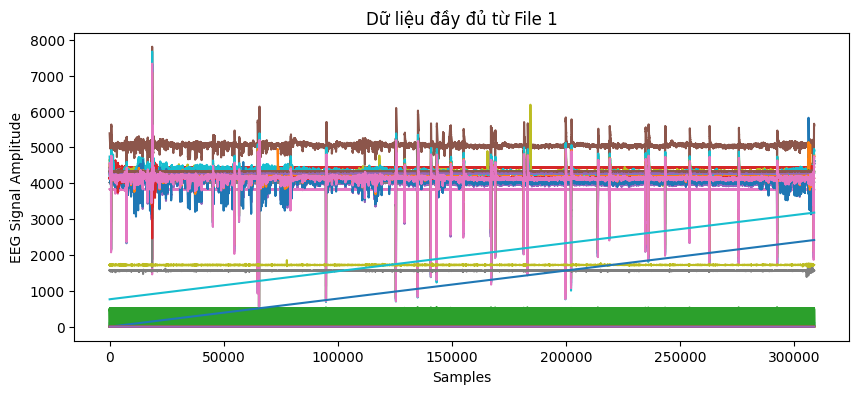


Dữ liệu EEG từ các kênh 4-17: (308868, 14)


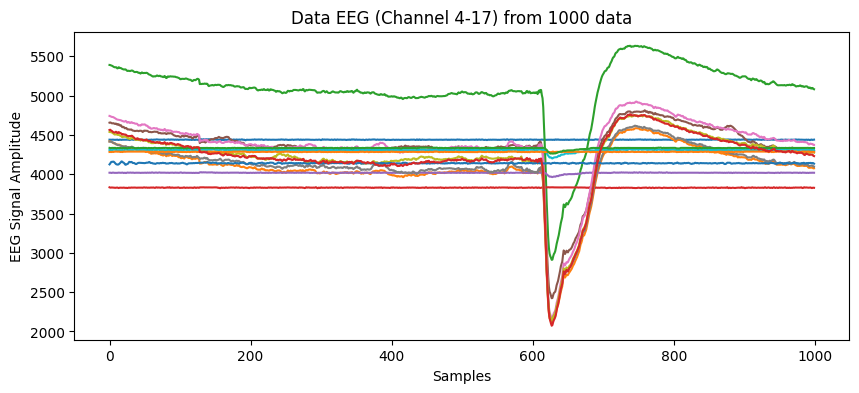

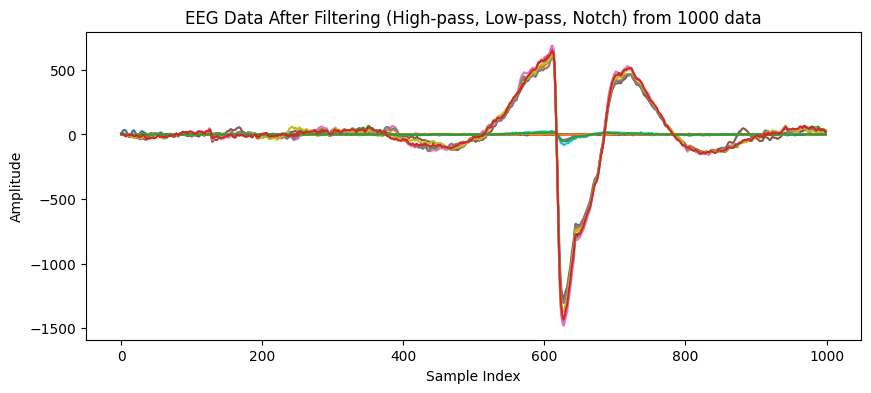

Dữ liệu đầy đủ từ file ../Data\eeg_record2.mat: (366020, 25)


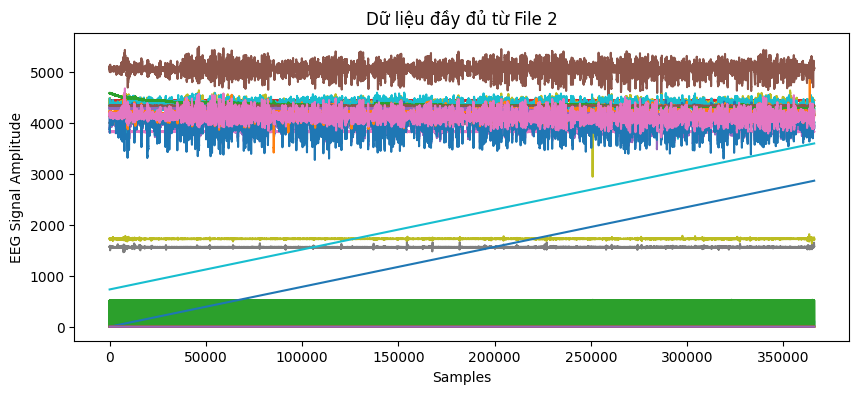


Dữ liệu EEG từ các kênh 4-17: (366020, 14)


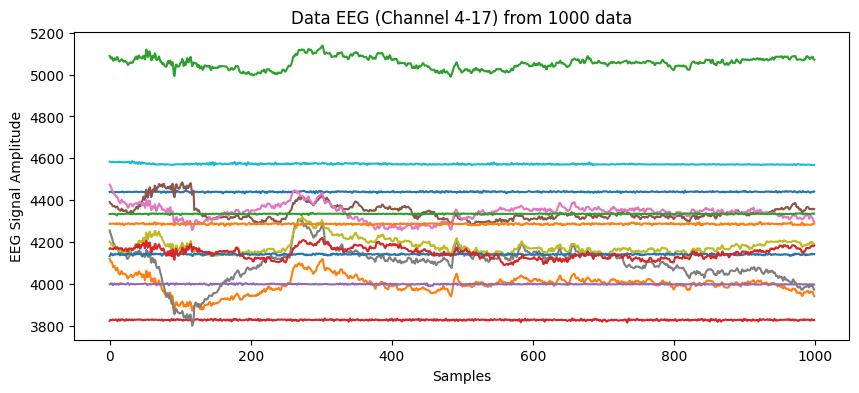

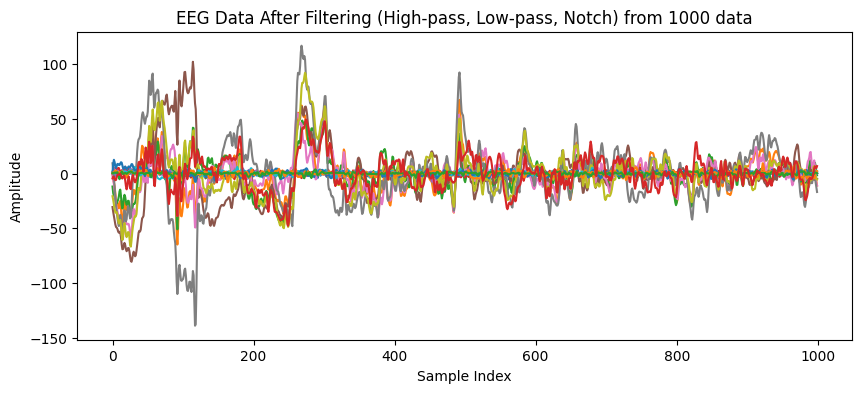

In [34]:
analyze_data(filtered_full_data, file_names)

[3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 31, 32, 33, 34]
Dữ liệu đầy đủ từ file ../Data\eeg_record4.mat: (380344, 25)


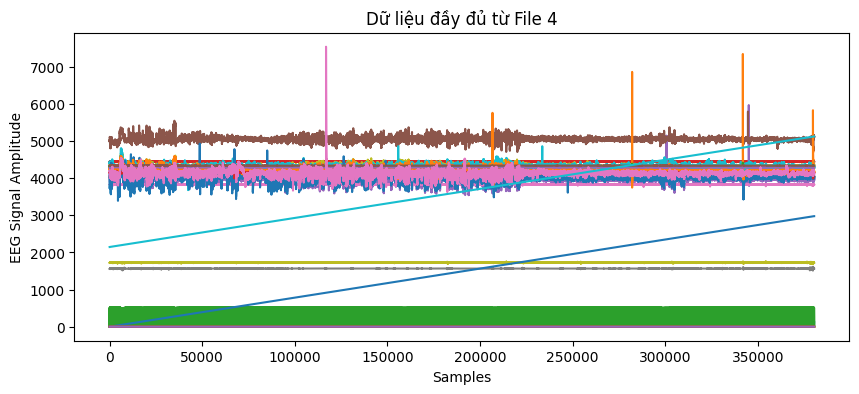


Dữ liệu EEG từ các kênh 4-17: (380344, 14)


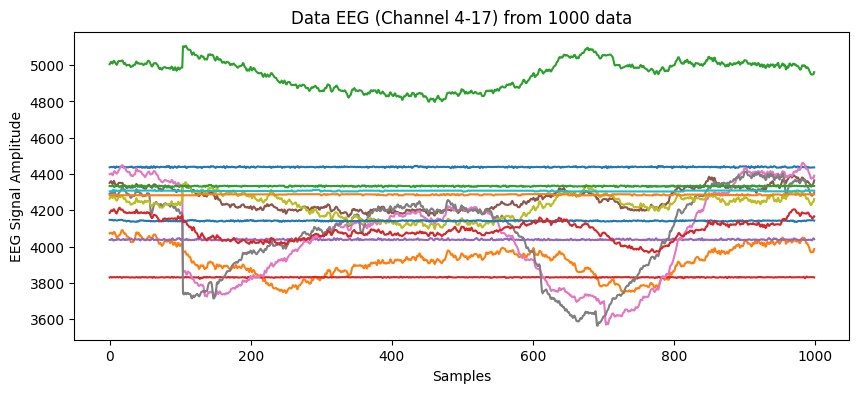

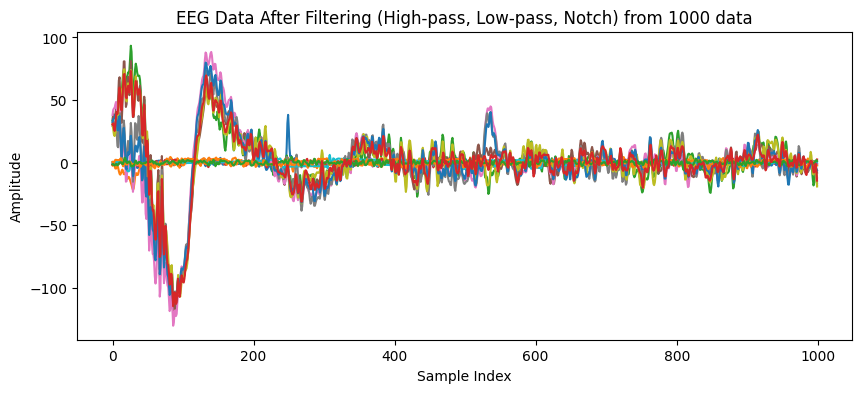

Dữ liệu đầy đủ từ file ../Data\eeg_record5.mat: (351204, 25)


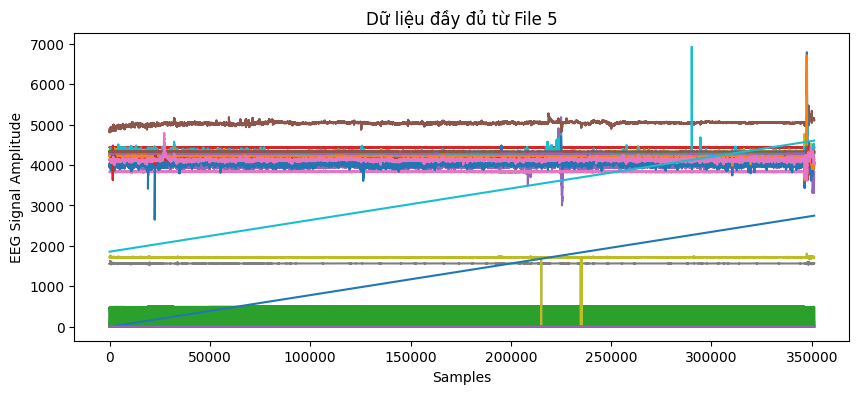


Dữ liệu EEG từ các kênh 4-17: (351204, 14)


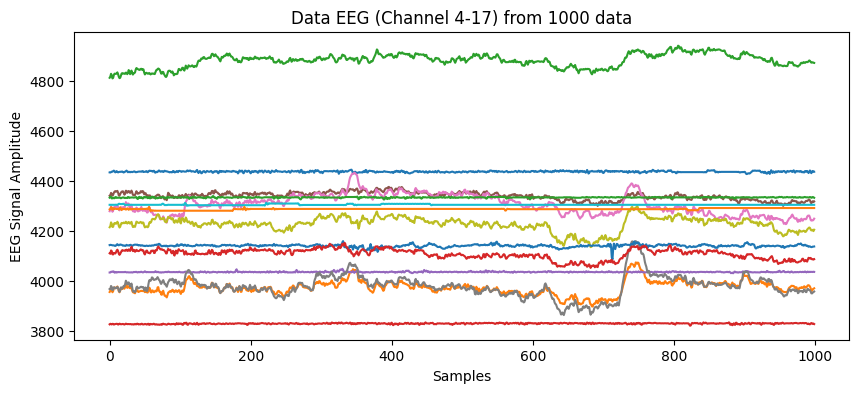

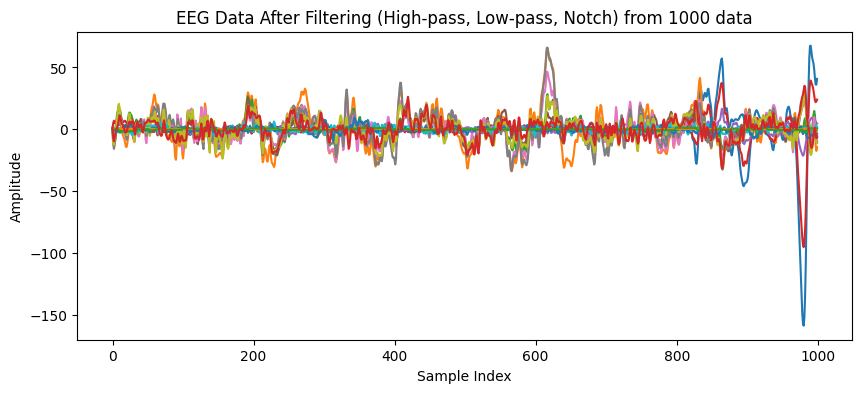

In [35]:
analyze_data(filtered_reduce_data, file_names, subject_map=subject_map)

In [55]:
def plot_frequency_bands(filtered_data, sampFreq):
    # Định nghĩa các dải tần số
    alpha_low, alpha_high = 8, 13  # Hz
    beta_low, beta_high = 13, 30  # Hz
    delta_low, delta_high = 0.5, 4  # Hz
    theta_low, theta_high = 4, 8  # Hz

    # Lọc thông dải để giữ lại các dải tần số khác nhau
    alpha_band = bandpass_filter(filtered_data, alpha_low, alpha_high, sampFreq)
    beta_band = bandpass_filter(filtered_data, beta_low, beta_high, sampFreq)
    delta_band = bandpass_filter(filtered_data, delta_low, delta_high, sampFreq)
    theta_band = bandpass_filter(filtered_data, theta_low, theta_high, sampFreq)

    channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

    # Biểu diễn tín hiệu dải delta
    plt.figure(figsize=(15, 6))
    plt.plot(delta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Delta Band (0.5-4 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()

    # Biểu diễn tín hiệu dải theta
    plt.figure(figsize=(15, 6))
    plt.plot(theta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Theta Band (4-8 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()

    # Biểu diễn tín hiệu dải alpha
    plt.figure(figsize=(15, 6))
    plt.plot(alpha_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Alpha Band (8-13 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()

    # Biểu diễn tín hiệu dải beta
    plt.figure(figsize=(15, 6))
    plt.plot(beta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
    plt.title('EEG Beta Band (13-30 Hz)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(channel_names, loc='upper right')
    plt.tight_layout()
    plt.show()


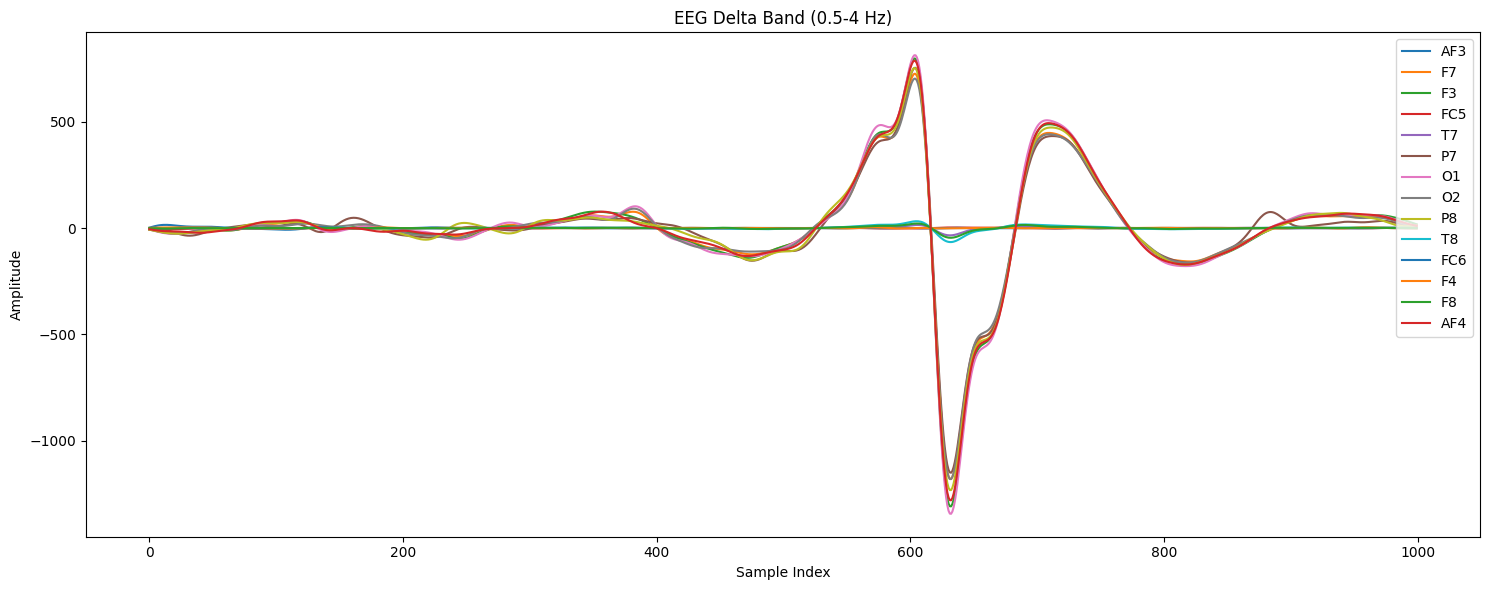

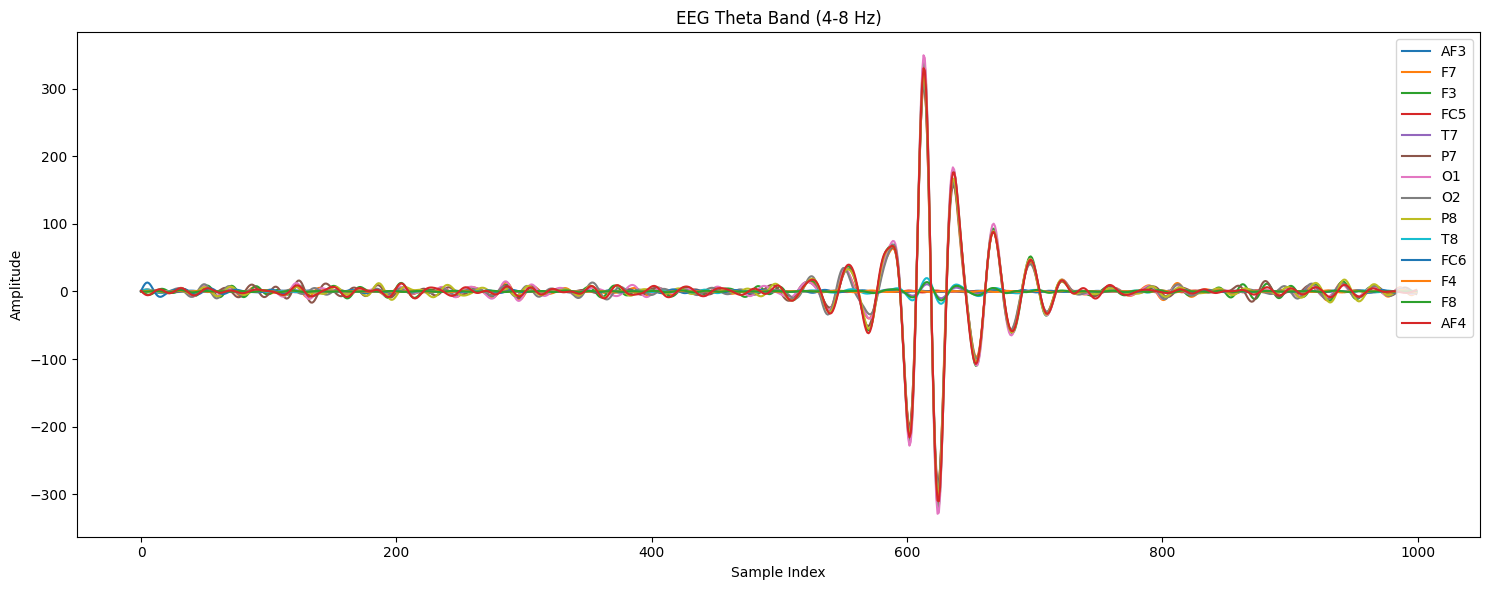

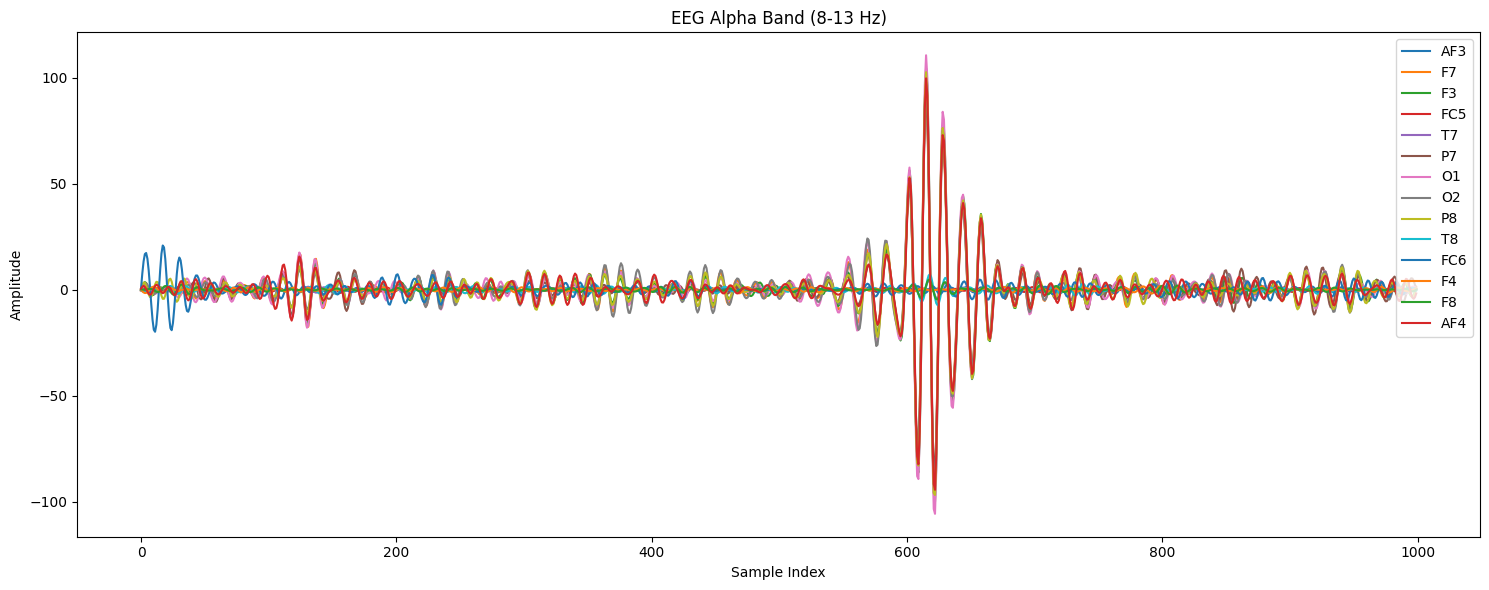

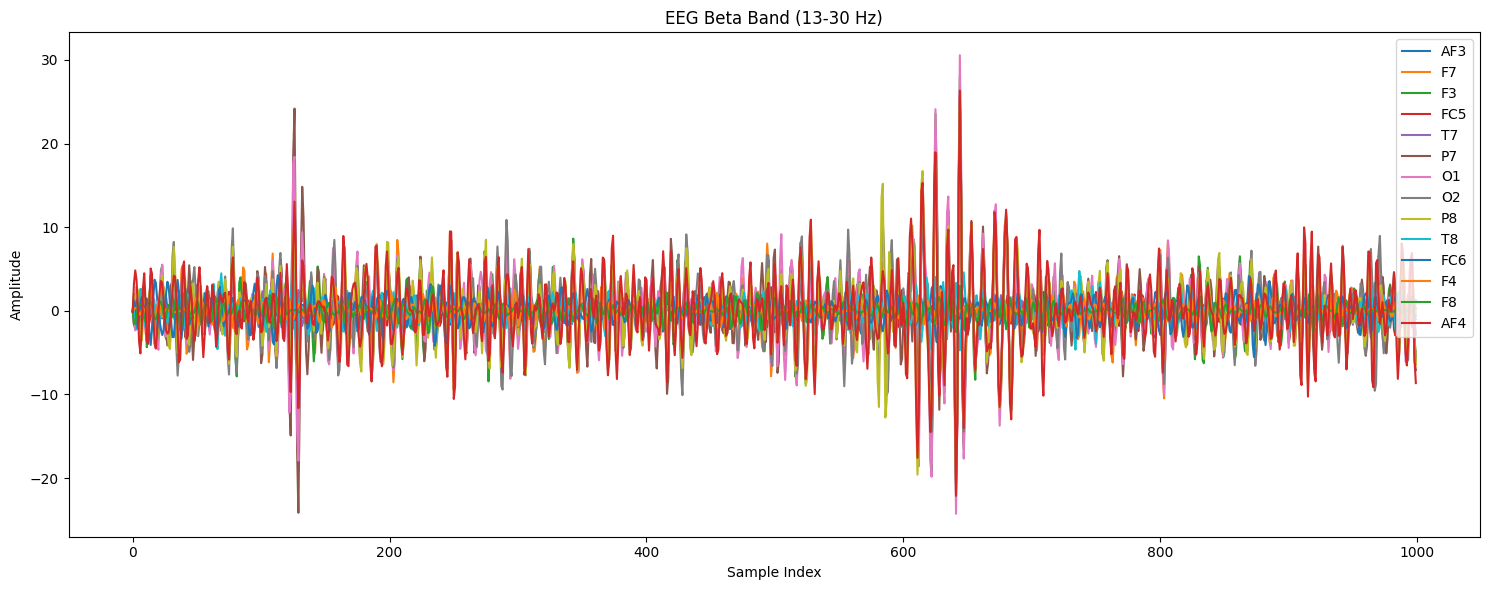

In [56]:
plot_frequency_bands(filtered_full_data[0], sampFreq_full_data)

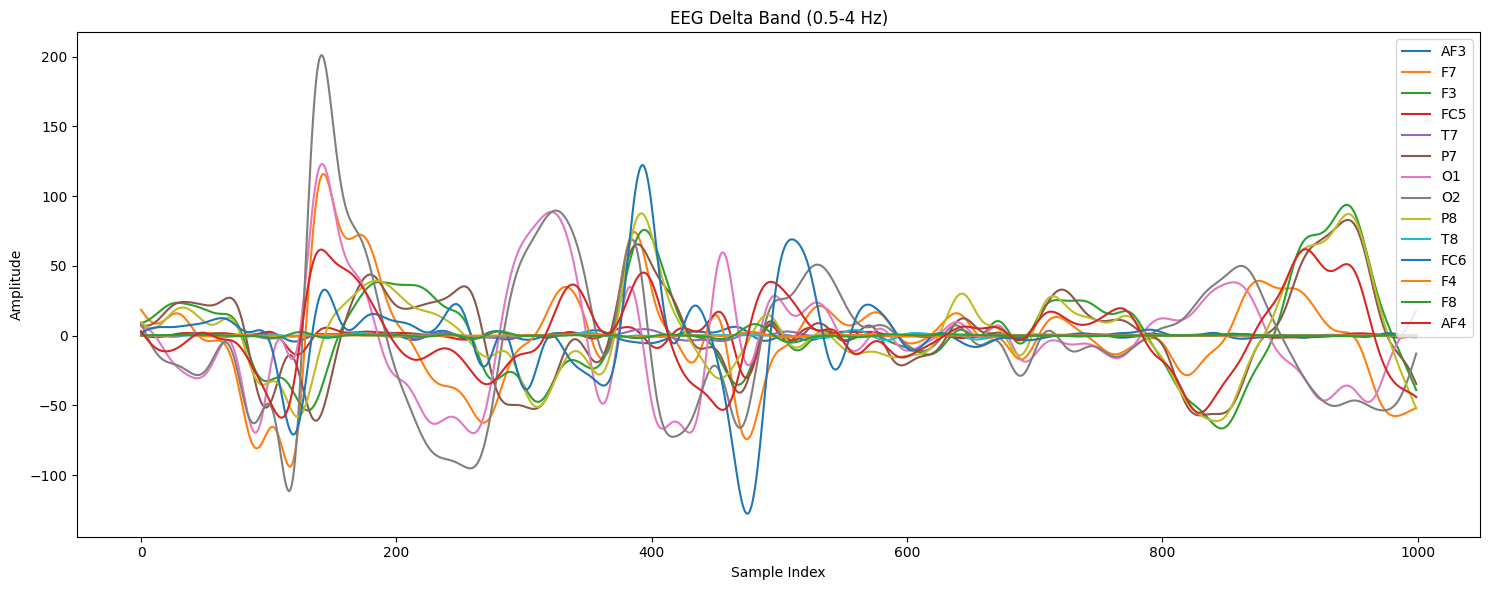

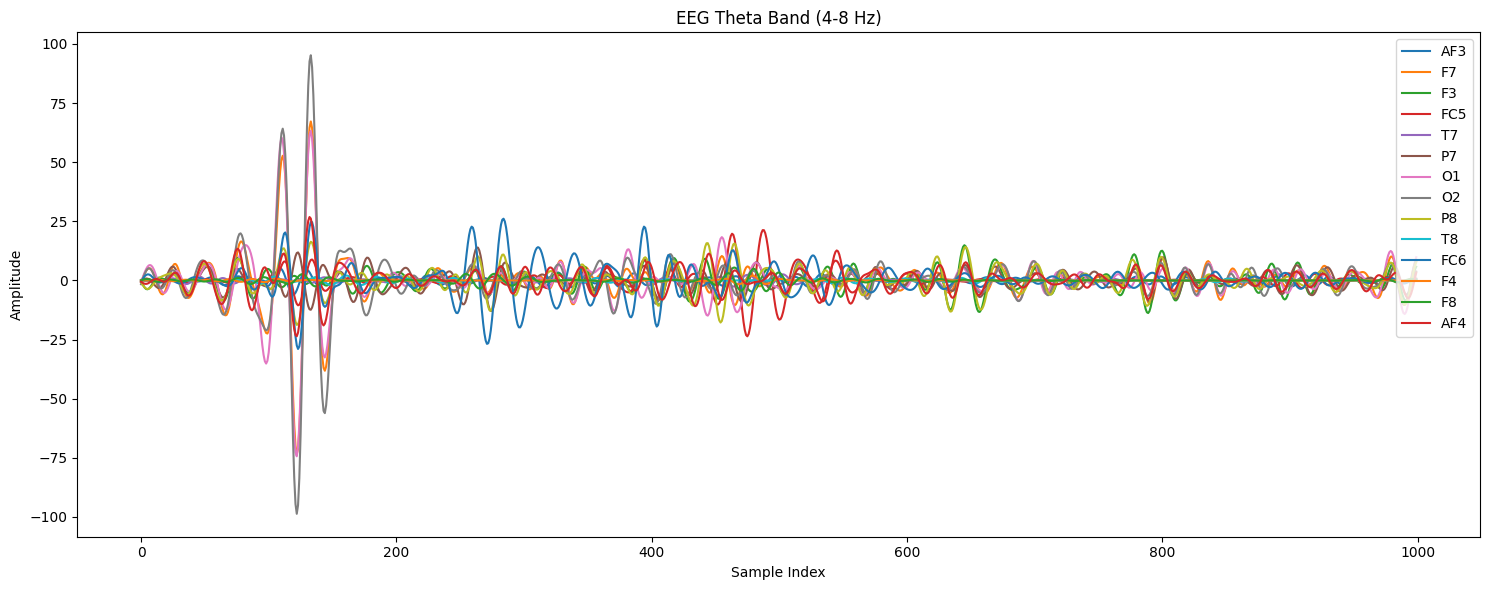

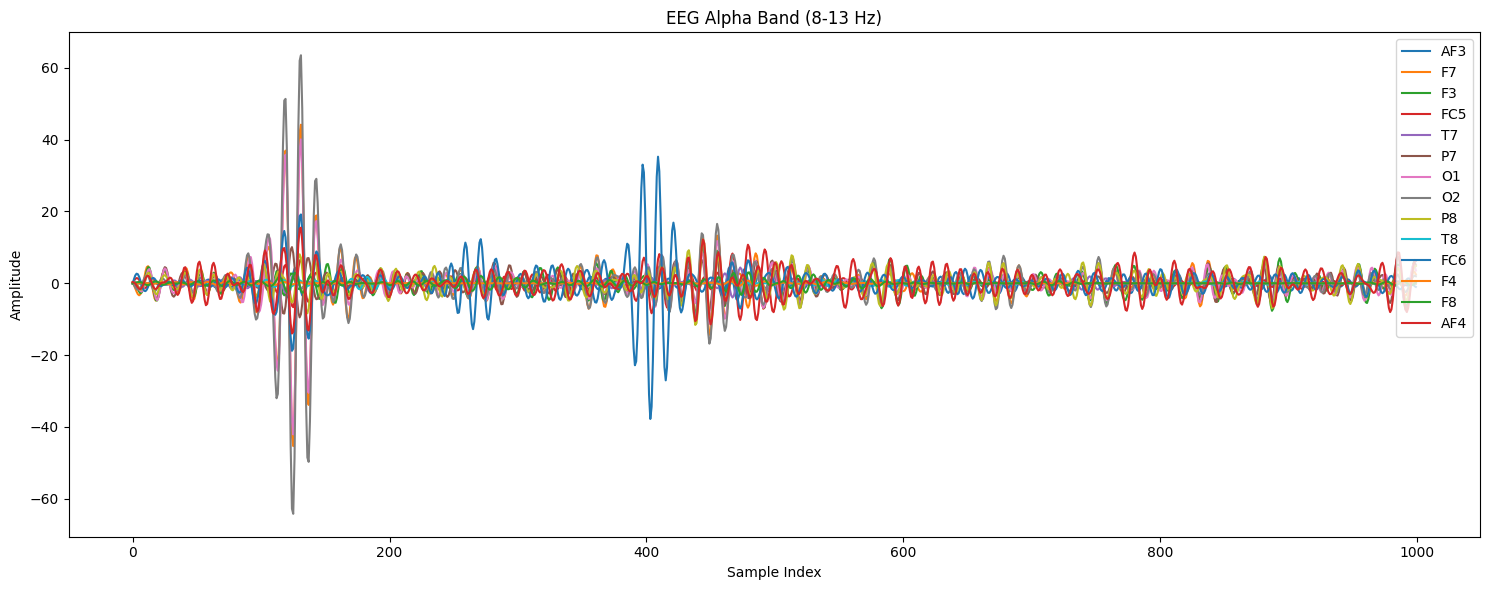

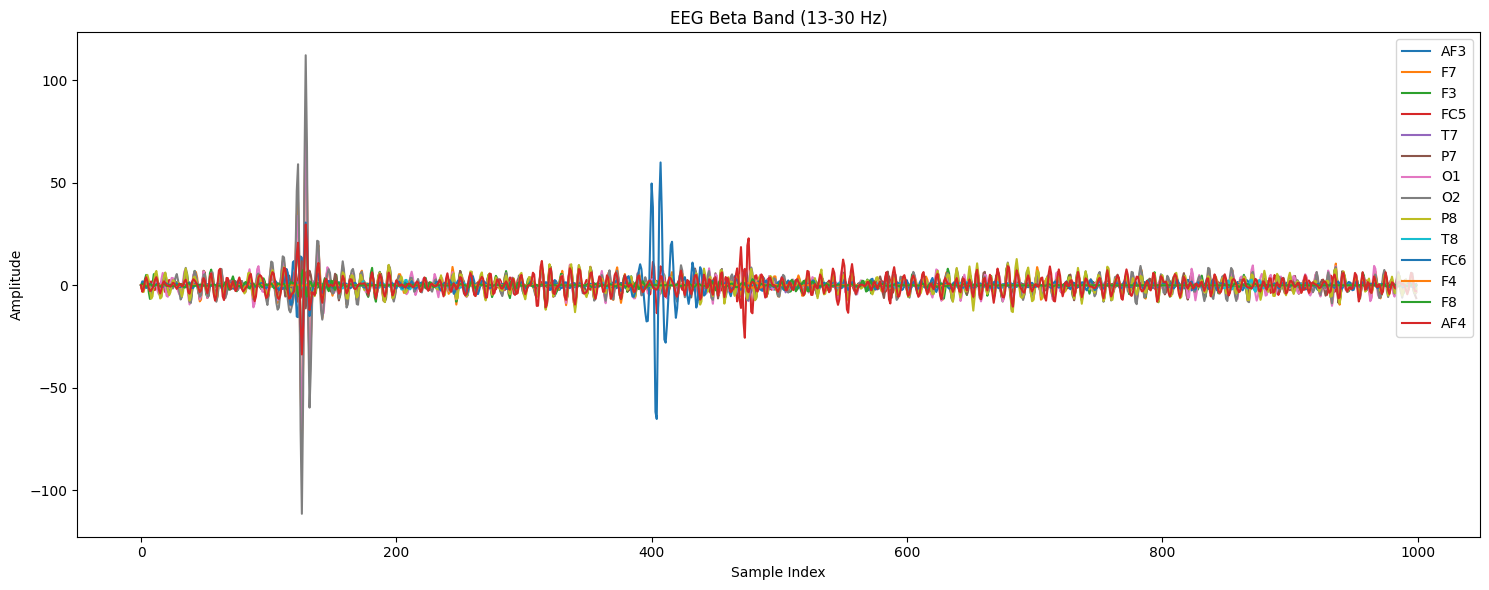

In [57]:
plot_frequency_bands(filtered_reduce_data[0], sampFreq_reduce_data)

# ICA

# Label

# Combine data